In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Get the columnt names for the dataset
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"])

id
station
date
prcp
tobs


In [10]:
columns_station = inspector.get_columns('station')
for column in columns_station:
    print(column["name"])

id
station
name
latitude
longitude
elevation


In [11]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23')

Text(0, 0.5, 'Inches')

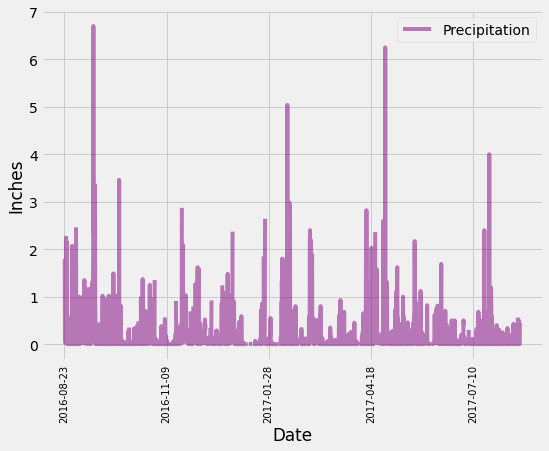

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_year = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).all()
precipitation_year 
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_year, columns = ['Date', 'Precipitation'])
# Sort the dataframe by date
precipitation_df_sorted = precipitation_df.sort_values(by='Date')
precipitation_df_sorted = precipitation_df_sorted.reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df_sorted.plot('Date','Precipitation', color='purple',figsize=(8,6), alpha=0.5)
plt.xticks(rotation="vertical", fontsize = 10)
plt.ylabel('Inches')

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df_sorted.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.id).count()
total_stations

9

In [51]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

sel = [Measurement.station,func.count(Measurement.id)]
active_stations = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest = session.query(func.min(Measurement.tobs)).\
        filter(Measurement.station == 'USC00519281').all()

highest = session.query(func.max(Measurement.tobs)).\
        filter(Measurement.station == 'USC00519281').all() 
average = session.query(func.avg(Measurement.tobs)).\
        filter(Measurement.station == 'USC00519281').all() 

print(f'The lowest temperature is {lowest}. The highesr temperature is {highest}. The average temprerature is {average}.')

The lowest temperature is [(54.0,)]. The highesr temperature is [(85.0,)]. The average temprerature is [(71.66378066378067,)].


In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

total_year_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= query_date).all()

total_df = pd.DataFrame(total_year_temp, columns = ['Date', 'Temperatures'])
total_df.head()

,Date,Temperatures
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


Text(0, 0.5, 'Frequency')

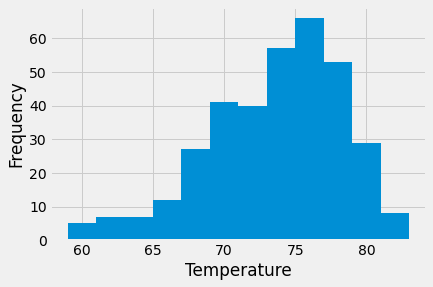

In [31]:
plt.hist(total_df['Temperatures'], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close session

In [30]:
# Close Session
session.close()